In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from PIL import Image
import sklearn.cluster as cluster
from skimage import io

from scipy.spatial import distance_matrix

try:
    os.chdir("/Users/ryan/Dropbox/1_proj/logos/")
except:
    os.chdir("/home/ryandew/Dropbox/1_proj/logos/")

In [2]:
name = "koinos"

## Assign colors to clusters:

In [3]:
color_centers = pd.read_csv("data/FINAL_cluster_centers/lab_centers_14_as_lab.csv", header=None)
color_centers

,0,1,2
0,9293.228009,-1.224270,2.399625
1,1128.127690,127.157710,-0.219349
2,5128.832775,5739.083846,4134.150660
3,3997.163741,558.003242,-3402.219924
4,4626.137907,-2982.920308,1455.820636
5,6438.294786,3070.694996,5284.594030
6,4840.510248,152.453862,47.325895
7,2661.718705,2372.928781,-4062.346693
8,6563.653568,70.847997,-112.694461
9,5947.017789,-867.709505,-2907.887496


In [4]:
logo_colors = pd.read_csv("code/extract_features/new_logo_outputs/" + name + "_colors.csv")
logo_colors

,name,area,frac,r,g,b,lab-l,lab-a,lab-b
0,koinos,1314,0.033508,12.953577,111.840944,13.814307,4316.296848,-3561.353435,3406.310491
1,koinos,33503,0.854341,254.649733,254.685371,254.649733,9332.036496,-1.726394,1.467623
2,koinos,3770,0.096137,1.879841,1.879841,1.879841,172.439620,-0.003988,0.007559
3,koinos,628,0.016014,139.063694,151.600318,139.183121,6046.263790,-594.946562,429.556439


In [5]:
logo_lab = logo_colors[['lab-l','lab-a','lab-b']].values
logo_lab

array([[ 4.31629685e+03, -3.56135343e+03,  3.40631049e+03],
       [ 9.33203650e+03, -1.72639378e+00,  1.46762344e+00],
       [ 1.72439620e+02, -3.98799399e-03,  7.55938731e-03],
       [ 6.04626379e+03, -5.94946562e+02,  4.29556439e+02]])

In [6]:
logo_colors['color_label'] = distance_matrix(x = logo_lab, y = color_centers.values).argmin(1)
logo_colors

,name,area,frac,r,g,b,lab-l,lab-a,lab-b,color_label
0,koinos,1314,0.033508,12.953577,111.840944,13.814307,4316.296848,-3561.353435,3406.310491,4
1,koinos,33503,0.854341,254.649733,254.685371,254.649733,9332.036496,-1.726394,1.467623,0
2,koinos,3770,0.096137,1.879841,1.879841,1.879841,172.439620,-0.003988,0.007559,1
3,koinos,628,0.016014,139.063694,151.600318,139.183121,6046.263790,-594.946562,429.556439,8


## Assign hull to cluster:

In [7]:
weighted_hull_centers = pd.read_csv("data/FINAL_cluster_centers/weighted_hull_centers.csv", header=None)
weighted_hull_centers

,0,1,2,3,4,5,6,7,8,9,...,615,616,617,618,619,620,621,622,623,624
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
logo_hull = pd.read_csv("code/extract_features/new_logo_outputs/" + name + "_hull.csv")
logo_hull

,0,1,2,3,4,5,6,7,8,9,...,616,617,618,619,620,621,622,623,624,id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,koinos


In [9]:
weight_mat = np.array([[np.max(np.abs([i-13,j-13])/12) for i in range(1,26)] for j in range(1,26)])
weighted_hull = weight_mat.flatten() * logo_hull.iloc[:,:625].values
logo_hull_label = distance_matrix(x = weighted_hull, y = weighted_hull_centers).argmin(1)

logo_hull_out = pd.DataFrame({'id': logo_hull['id'], 'label': logo_hull_label})
logo_hull_out

,id,label
0,koinos,3


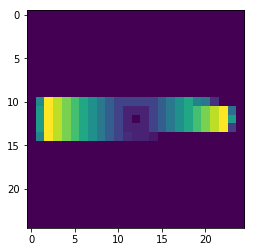

In [10]:
plt.imshow(weighted_hull.reshape(25,25))

## Assign marks to clusters

In [11]:
mark_centers = pd.read_csv("data/FINAL_cluster_centers/mark_centers.csv", header = None, index_col = 0)
mark_centers

,1,2,3,4,5,6,7,8,9,10,...,616,617,618,619,620,621,622,623,624,625
0,,,,,,,,,,,,,,,,,,,,,
bad_letters,0.081361,0.146763,0.408319,0.567549,0.673769,0.727163,0.780095,0.815544,0.783888,0.811415,...,0.416822,0.498165,0.549621,0.688850,0.713621,0.627881,0.542203,0.419958,0.103179,0.063768
bulky_hollow_geometric,0.030012,0.089596,0.081837,0.053787,0.051660,0.015034,0.014815,0.014815,0.029677,0.080500,...,0.056054,0.060823,0.057737,0.069311,0.042919,0.042919,0.073129,0.089796,0.063115,0.037037
circular,0.021048,0.060990,0.078410,0.091429,0.091429,0.094245,0.108627,0.151454,0.276014,0.462491,...,0.379366,0.167992,0.047631,0.006045,0.003235,0.002976,0.002976,0.002976,0.002976,0.000966
dense_simple_geometric,0.000000,0.000000,0.000000,0.012643,0.069298,0.103857,0.160257,0.187553,0.217837,0.252203,...,0.390779,0.366980,0.392307,0.367947,0.334547,0.256697,0.167609,0.124594,0.060626,0.013815
detailed_fit_in_circle,0.006485,0.006500,0.017164,0.026392,0.019816,0.020658,0.026500,0.024657,0.028555,0.014898,...,0.019690,0.004123,0.010000,0.010270,0.013858,0.017397,0.000723,0.001050,0.000000,0.000000
hollow_circles,0.019084,0.062945,0.072207,0.072872,0.075266,0.082001,0.092789,0.112142,0.203873,0.384910,...,0.368537,0.213780,0.096564,0.072772,0.082490,0.070479,0.062662,0.041471,0.040343,0.012351
horizontal_complex,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
long_horizonal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
simple_shapes,0.017804,0.020833,0.007083,0.000958,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.009450,0.020833,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [12]:
os.path.exists("code/extract_features/new_logo_outputs/" + name + "_mark_features.csv")

True

In [13]:
try:
    logo_marks = pd.read_csv("code/extract_features/new_logo_outputs/" + name + "_marks.csv")
    logo_mark_descs = pd.read_csv("code/extract_features/new_logo_outputs/" + name + "_mark_features.csv")
    logo_marks['frac'] = logo_mark_descs['frac']

except:
    logo_marks = 'NA'
    
logo_marks

,name,index,0,1,2,3,4,5,6,7,...,616,617,618,619,620,621,622,623,624,frac
0,koinos,1,0.0,0.0,0.0,0.047039,0.720632,0.836934,1.0,0.850789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057657


In [14]:
if isinstance(logo_marks, pd.DataFrame):
    marks_pix = logo_marks.iloc[:,2:627].values
    logo_marks['cluster'] = distance_matrix(x = marks_pix, y = mark_centers.values).argmin(1)
logo_marks

,name,index,0,1,2,3,4,5,6,7,...,617,618,619,620,621,622,623,624,frac,cluster
0,koinos,1,0.0,0.0,0.0,0.047039,0.720632,0.836934,1.0,0.850789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057657,12


## Save labeled outputs

In [15]:
logo_colors.to_csv("code/extract_features/new_logo_outputs/"+name+"_colors_labeled.csv", index=False)

In [16]:
logo_hull_out.to_csv("code/extract_features/new_logo_outputs/"+name+"_hull_labeled.csv", index=False)

In [17]:
if isinstance(logo_marks, pd.DataFrame):
    logo_marks.to_csv("code/extract_features/new_logo_outputs/"+name+"_marks_labeled.csv", index=False)